# Description of the dataset 
# The Netflix Titles dataset is a comprehensive compilation of movies and TV shows available on Netflix, covering various aspects such as the title type, director, cast, country of production, release year, rating, duration, genres (listed in), and a brief description. This dataset is instrumental for analyzing trends in Netflix content, understanding genre popularity, and examining the distribution of content across different regions and time periods.
# 
Key Detail
# :
Total Entries: The dataset contains 8,809 entries, each representing a unique movie or TV sho# w.
Columns: There are 12 columns in the datas# et:
show_id: A unique identifier for each ti# tle.
type: The category of the title, which is either 'Movie' or 'TV S# how'.
title: The name of the movie or TV#  show.
director: The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be appli# cable.)
cast: The list of main actors/actresses in the title. (Some entries might not have this infor# mation.)
country: The country or countries where the movie or TV show was # produced.
date_added: The date the title was added t# o Netflix.
release_year: The year the movie or TV show was originall# y released.
rating: The age rating o# f the title.
duration: The duration of the title, in minutes for movies and seasons # for TV shows.
listed_in: The genres the titl# e falls under.
description: A brief summary of the title.

# citation of the dataset --> https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/data

In [1]:
!pip install pandas

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\Yogi\Downloads\customer_booking.csv",encoding='latin1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.shape

(50000, 14)

In [9]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

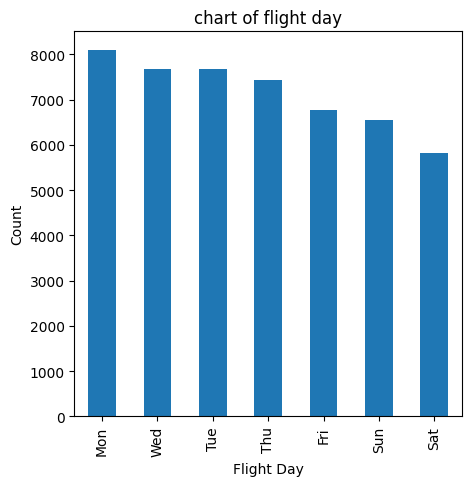

In [10]:
plt.figure(figsize=(5,5))
df['flight_day'].value_counts().plot(kind='bar')
plt.xlabel('Flight Day')
plt.ylabel('Count')
plt.title('chart of flight day')
plt.show()

In [24]:
# Preprocessing: Assuming 'Purchase Lead' as the target variable and other columns as features
X = df.drop('num_passengers', axis=1)  # Features
y = df['num_passengers']  # Target variable

In [25]:
# Perform one-hot encoding for categorical features
X = pd.get_dummies(X)

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Predictions
y_pred = model.predict(X_test)

In [29]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6473


In [30]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.92      0.79      6319
           2       0.44      0.25      0.32      2539
           3       0.21      0.04      0.07       538
           4       0.23      0.03      0.05       384
           5       0.31      0.04      0.07       105
           6       0.31      0.08      0.12        51
           7       0.00      0.00      0.00        23
           8       0.50      0.05      0.09        21
           9       0.20      0.05      0.08        20

    accuracy                           0.65     10000
   macro avg       0.32      0.16      0.18     10000
weighted avg       0.58      0.65      0.59     10000



In [31]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5798  478   30    9    1    2    0    0    1]
 [1851  633   32   14    5    2    1    0    1]
 [ 378  126   21    9    1    1    0    1    1]
 [ 245  115    8   11    2    2    1    0    0]
 [  57   38    3    2    4    1    0    0    0]
 [  27   16    2    2    0    4    0    0    0]
 [  15    6    1    0    0    0    0    0    1]
 [  13    4    1    1    0    1    0    1    0]
 [  11    7    1    0    0    0    0    0    1]]


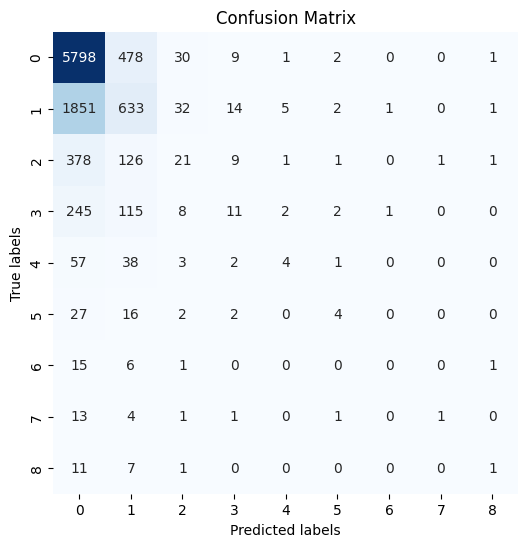

In [36]:
# Plot heatmap for confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
